# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 562


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la passe
Processing Record 2 of Set 1 | quibdo
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | kilindoni
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | santa cruz
Processing Record 16 of Set 1 | belmonte
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | corner brook
Processing Record 20 of Set 1 | andergrove
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | bandar abbas
Processing Reco

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          531
Lat           531
Lng           531
Max Temp      531
Humidity      531
Cloudiness    531
Wind Speed    531
Country       531
Date          531
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la passe,45.5549,-0.8967,289.47,68,67,2.64,FR,1728639165
1,quibdo,5.6947,-76.6611,294.84,99,90,0.80,CO,1728639166
2,iqaluit,63.7506,-68.5145,274.00,80,100,3.09,CA,1728638958
3,puerto natales,-51.7236,-72.4875,274.89,92,83,2.72,CL,1728639168
4,alice springs,-23.7000,133.8833,303.90,11,100,4.63,AU,1728639169


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la passe,45.5549,-0.8967,289.47,68,67,2.64,FR,1728639165
1,quibdo,5.6947,-76.6611,294.84,99,90,0.80,CO,1728639166
2,iqaluit,63.7506,-68.5145,274.00,80,100,3.09,CA,1728638958
3,puerto natales,-51.7236,-72.4875,274.89,92,83,2.72,CL,1728639168
4,alice springs,-23.7000,133.8833,303.90,11,100,4.63,AU,1728639169


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

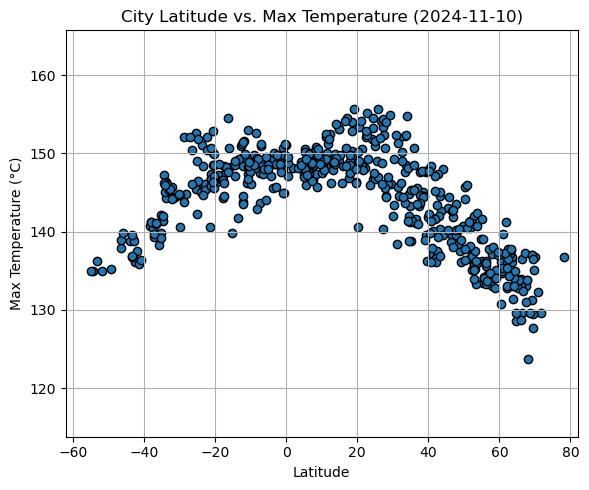

In [40]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = (city_data_df['Max Temp'] -32) * (5/9)

plt.figure(figsize=(6, 5)) 
plt.scatter(x_axis, y_axis,edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-11-10)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
# Setting limits for the x-axis
plt.xlim(-62, 82)  
# SEtting limits for the y-axis
plt.ylim(min(y_axis) - 10, max(y_axis) + 10)  
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

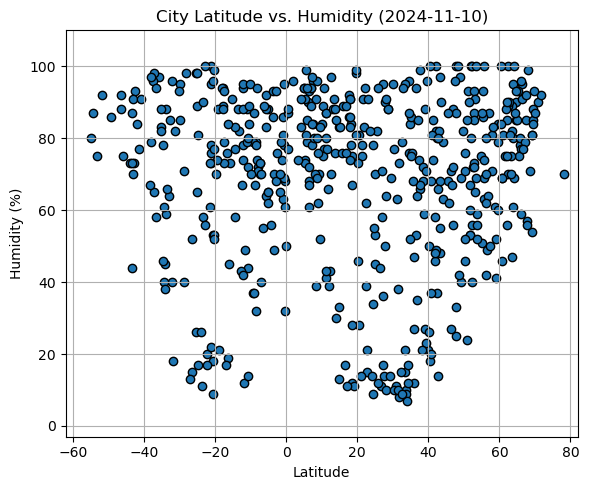

In [16]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.figure(figsize=(6, 5)) 
plt.scatter(x_axis, y_axis,edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-11-10)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Setting limits for the x-axis
plt.xlim(-62, 82)  
# SEtting limits for the y-axis
plt.ylim(min(y_axis) - 10, max(y_axis) + 10)  
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

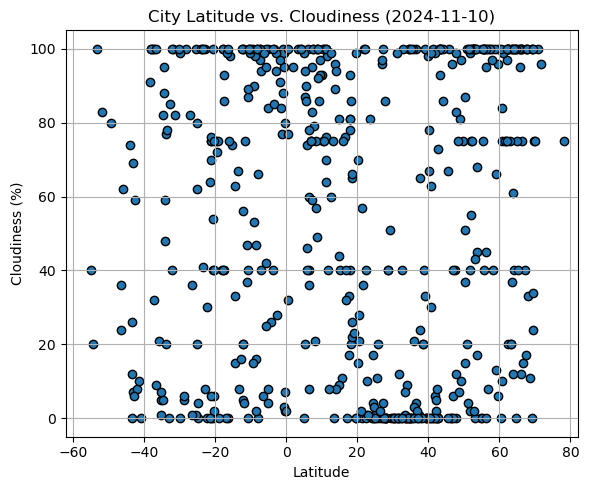

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.figure(figsize=(6, 5)) 
plt.scatter(x_axis, y_axis,edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-11-10)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Setting limits for the x-axis
plt.xlim(-62, 82)  
# SEtting limits for the y-axis
plt.ylim(min(y_axis) - 5, max(y_axis) + 5)  
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

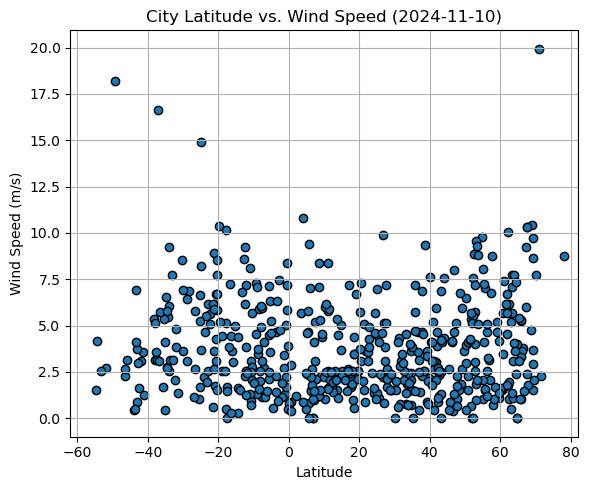

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.figure(figsize=(6, 5)) 
plt.scatter(x_axis, y_axis,edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-11-10)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Setting limits for the x-axis
plt.xlim(-62, 82)  
# SEtting limits for the y-axis
plt.ylim(min(y_axis) - 1, max(y_axis) + 1)  
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label):
      
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot scatter plot and setting figure size
    plt.figure(figsize=(6, 5))  
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, color='red')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Annotate the line equation and r-squared value
    plt.annotate(line_eq, (min(x_values) + 5, max(y_values) - 5), fontsize=15, color="red")
    print(f"The r^2-value is: {r_value**2}")  
    
    # Show the plot
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la passe,45.5549,-0.8967,289.47,68,67,2.64,FR,1728639165
1,quibdo,5.6947,-76.6611,294.84,99,90,0.80,CO,1728639166
2,iqaluit,63.7506,-68.5145,274.00,80,100,3.09,CA,1728638958
7,nemuro,43.3236,145.5750,284.72,68,93,6.86,JP,1728639173
8,badger,64.8000,-147.5333,273.10,90,100,0.00,US,1728639174


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,274.89,92,83,2.72,CL,1728639168
4,alice springs,-23.7000,133.8833,303.90,11,100,4.63,AU,1728639169
5,kilindoni,-7.9139,39.6668,299.69,72,0,4.94,TZ,1728639171
6,port-aux-francais,-49.3500,70.2167,275.48,86,80,18.21,TF,1728639172
12,blackmans bay,-43.0167,147.3167,282.22,70,7,0.89,AU,1728639178


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7228979692043719


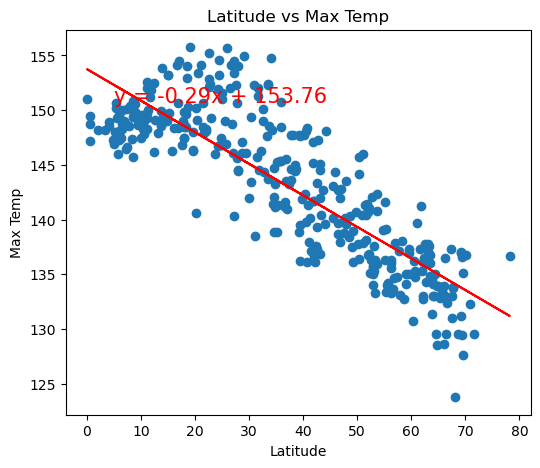

In [32]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], ((northern_hemi_df["Max Temp"]-32) * (5/9)), "Latitude vs Max Temp", "Latitude", "Max Temp")


The r^2-value is: 0.5500451739991133


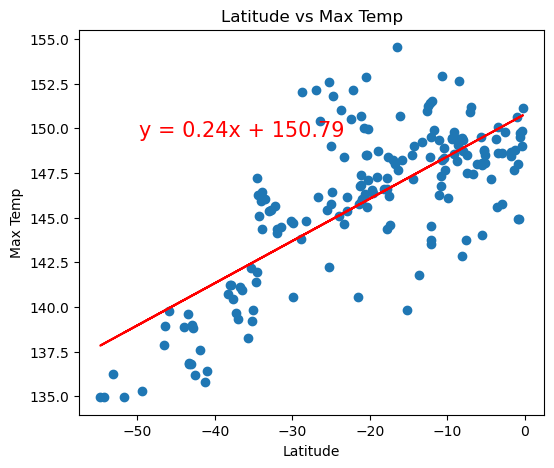

In [33]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], ((southern_hemi_df["Max Temp"]-32) * (5/9)), "Latitude vs Max Temp", "Latitude", "Max Temp")


**Discussion about the linear relationship:** 
The first graph shows a strong correlation (r^2 = 0.725), indicating an ongoing decrease in temperature with increasing latitude in the Northern Hemisphere. However the secong graph shows more variations (r^2 = 0.550), this is due to factors such as being near the ocean or other environment influences in the Southern Hemisohere. Overall, these linear models accurately represent the overall pattern of temperature changes with latitude in both hemispheres

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.004874268181631557


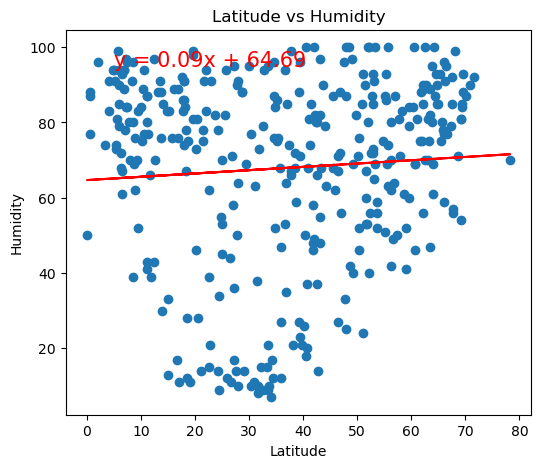

In [34]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude vs Humidity", "Latitude", "Humidity")

The r^2-value is: 0.006225673055606242


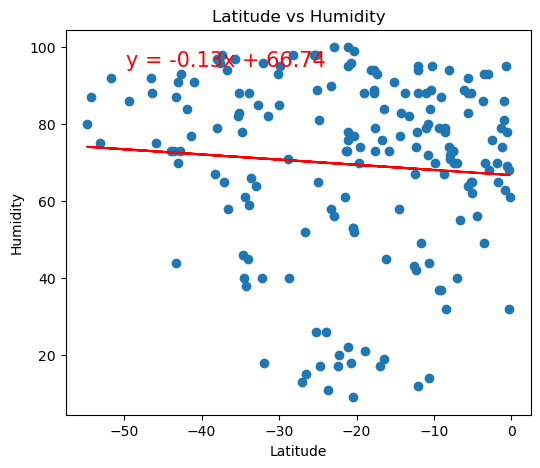

In [35]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude vs Humidity", "Latitude", "Humidity")

**Discussion about the linear relationship:** 
The first graph shows a very small positive slope, implying that humidity increases somewhat with latitude. However, the low r^2 value (0.0048) suggests that latitude does not significantly impact humidity variability.
The second graph shows a very small negative slope, implying that humidity decreases somewhat with latitude in the Southern Hemisphere. Again, the low r^2 value (0.0062) suggests that the trend is not significantly significant. Therefore, both the Northern and Southern Hemisohere graphs, the relationship between latitude and humidity is very weak as shown in the extremely low r^2 values. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006926378957276259


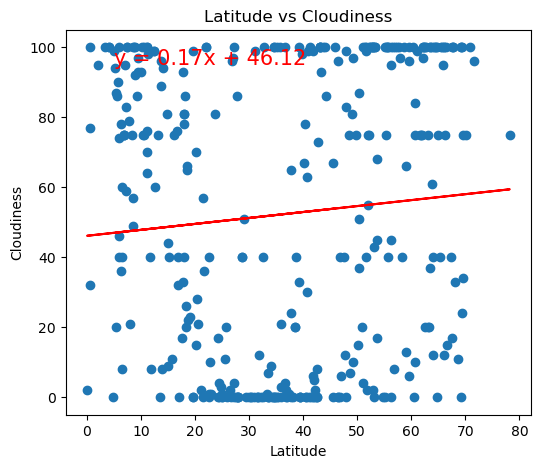

In [36]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude vs Cloudiness", "Latitude", "Cloudiness")


The r^2-value is: 0.02741796910778893


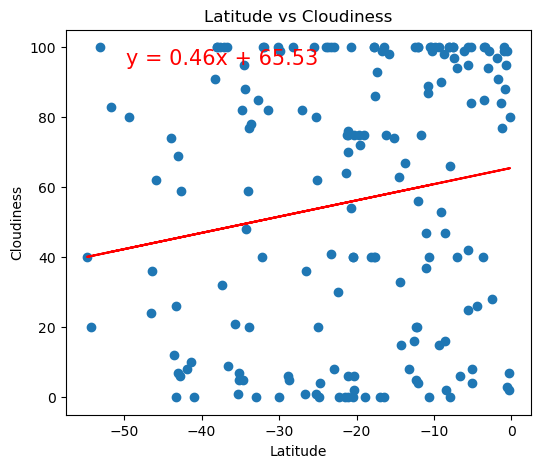

In [37]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude vs Cloudiness", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 
The graphs for the Northern and Southern Hemispheres show a weak linear relationships between latitude and cloudiness. The Northern graph's r^2 value is increadidibly low (0.0069), showing that latitude explains less than 1% of the variance in cloudiness. 
Moreover, the Southern Hemisphere has a steeper slope (y=0.46x) than the Northern Hemisphere, demosntrating that cloudiness increase more significantly as latitude increases. However, the r^2 value is still low (0.0274), indicating that latitude only explains 2.7% of variantion in cloudiness. While Southern Hemisphere is slightly better than the Northern Hemisphere, it is still a weak relationship, suggeting that other varaibles are likely affecting cloudiness levels. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.05205954336289085


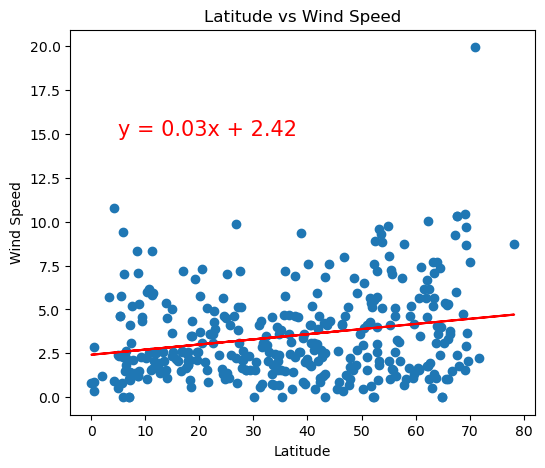

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude vs Wind Speed", "Latitude", "Wind Speed")

The r^2-value is: 0.00639086272790981


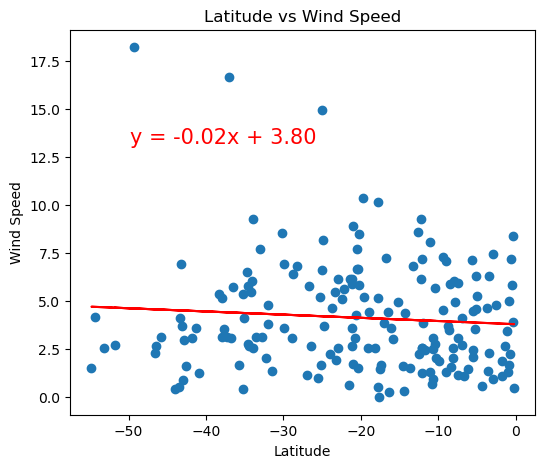

In [39]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude vs Wind Speed", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** 
The line's positive (0.03) slope in the Northern Hemisphere indicates that the speed rises somewhat with latitude. However, the r^2 value is still rather low (0.0521) implying that there is no correlation between the latitude and wind speed and that varaibles other than latitude have a greater impact on wind speed. On the other side, the slope is positive but considerably lower (0.02) in the Southern Hemisphere, indicating that wind speed rises very slightlu with latitude. As a result, the Southern Hemisphere has an even weaker link between latitude and wind speed than the Northern Hemisphere. This shows that latitude is not a significant determinant of wind speed, and other environmental factors are likely far more important in explaining variations in wind speed across different regions. 